# BFM PROJECT

In [6]:
# libraries import
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb 

## Part - I    Data Preprocessing

In [3]:
data=pd.read_csv("ParisHousing.csv")

In [5]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
data.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


In [7]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
# check duplication
data.duplicated().sum()

0

In [9]:
# handle the duplication
data.drop_duplicates(inplace=True)

In [10]:
# Extraction of IV and DV
# Dependent variable is Price
# The rest are independent variables
X=data.iloc[:, 0:16] 
Y=data.iloc[:,16:17] 

In [11]:
Y.head()

,price
0,7559081.5
1,8085989.5
2,5574642.1
3,3232561.2
4,7055052.0


In [12]:
X.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4


In [19]:
correlation=data.corr()
correlation

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


In [18]:
correlation

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


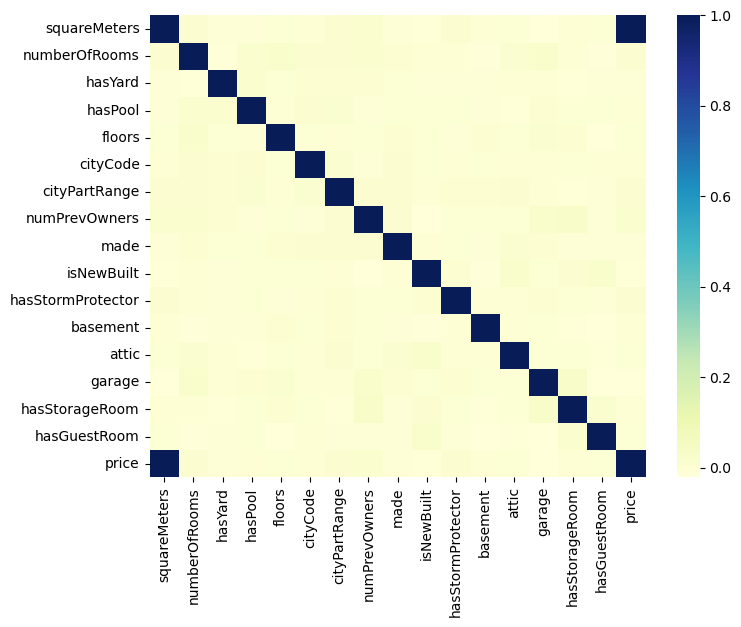

In [17]:
# plotting correlation heatmap 
plt.figure(figsize=(8, 6))
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu" , annot=False)
plt.show()

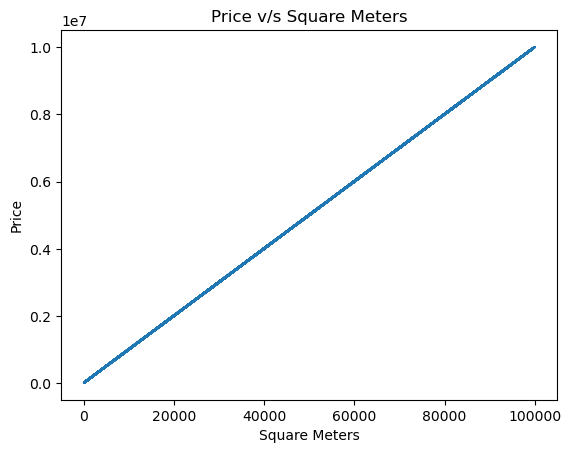

In [13]:
plt.plot(data["squareMeters"],data["price"])
plt.xlabel("Square Meters")
plt.ylabel("Price")
plt.title("Price v/s Square Meters")
plt.show()

# Part - 1 Applying different regression models

### 1) Multiple Linear Regression

In [13]:
# Dataset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [14]:
# feature scalling ---Standization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [15]:
# MLR Model creation --- Model Training
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Prediction 
Y_pred=mlr.predict(X_test)
Y_pred

array([[1405028.42333868],
       [ 504744.1354202 ],
       [6276099.29803173],
       ...,
       [6190761.49507183],
       [8867268.17707433],
       [9508136.58849358]])

In [17]:
# Ecaluate the perfromance of the model---r2_score
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.9999566785081

## 2) Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=4)
X_poly=poly_feat.fit_transform(X)
X_poly

array([[1.0000e+00, 7.5523e+04, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.4010e+03],
       [1.0000e+00, 8.0771e+04, 3.9000e+01, ..., 4.0000e+00, 8.0000e+00,
        1.6000e+01],
       [1.0000e+00, 5.5712e+04, 5.8000e+01, ..., 8.1000e+01, 7.2900e+02,
        6.5610e+03],
       ...,
       [1.0000e+00, 8.3841e+04, 3.0000e+00, ..., 8.1000e+01, 7.2900e+02,
        6.5610e+03],
       [1.0000e+00, 5.9036e+04, 7.0000e+01, ..., 1.6000e+01, 6.4000e+01,
        2.5600e+02],
       [1.0000e+00, 1.4400e+03, 8.4000e+01, ..., 3.6000e+01, 2.1600e+02,
        1.2960e+03]])

In [19]:
# Dataset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_poly,Y, test_size=0.2, random_state=0)

In [20]:
# Create the mode----Poly Regr
from sklearn.linear_model import LinearRegression
poly_reg=LinearRegression()
poly_reg.fit(X_train, Y_train)

LinearRegression()

In [21]:
Y_pred_2=poly_reg.predict(X_test)
Y_pred_2

array([[1401953.89055686],
       [ 504668.44870117],
       [6277590.64973277],
       ...,
       [6194332.0155383 ],
       [8865788.42132145],
       [9508874.24741162]])

In [22]:
# Ecaluate the perfromance of the model---r2_score
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_2)*100

99.99992150143888

## 3) Lasso

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
# Model Training
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [25]:
# Prediction --Testing
Y_pred=lasso.predict(X_test)

In [26]:
# Evaluate the perfromance of the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.99996014889334

## 4) Ridge

In [27]:
# Model Training
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [28]:
# Prediction --Testing
Y_pred=ridge.predict(X_test)

In [29]:
# Evaluate the perfromance of the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.99996014906777

## 5) Random Forest Regressor

In [30]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=6)

In [31]:
# Model Training
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, Y_train)

/Users/pramilpal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50)

In [32]:
# Prediction --Testing
Y_pred=rfr.predict(X_test)

In [33]:
# Evaluate the perfromance of the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.99981462915042

## 6) Decision Tree Regressor

In [34]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=9)

In [35]:
# Model Training
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [36]:
# Prediction --Testing
Y_pred=dtr.predict(X_test)

In [37]:
# Evaluate the perfromance of the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.99963485190742

## 7) KNN Regressor

In [38]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=56)

In [39]:
# Model Creation KNN Regressor Model
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
# Prediction
Y_pred=knnr.predict(X_test)

In [41]:
# Evalute the perfromance of the model
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

99.91837565559443